# **Problem Statement 14**

Use Autoencoder to implement anomaly detection on ecg dataset. Build the model by using



```
a.	Import required libraries
b.	Upload / access the dataset
c.	Encoder converts it into latent representation
d.	Decoder networks convert it back to the original input
e.	Compile the models with Optimizer, Loss, and Evaluation Metrics

```



## **Import Necessary Packages**

In [13]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [14]:
DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(DATA, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [15]:
data.shape

(4998, 141)

In [16]:
features = data.drop(140, axis=1)
target = data[140]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [18]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [20]:
class Autoencoder(Model):
  def __init__(self, output_units, ldim=8):
    super().__init__()
    self.encoder = Sequential([
        Dense(64, activation="relu"),
        Dropout(0.1),
        Dense(32, activation="relu"),
        Dropout(0.1),
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(ldim, activation="relu")
    ])

    self.decoder = Sequential([
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(32, activation="relu"),
        Dropout(0.1),
        Dense(64, activation="relu"),
        Dropout(0.1),
        Dense(output_units, activation="relu")
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


In [22]:
model = Autoencoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer="adam")

epochs = 20

h = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.1400 - mse: 0.2322 - val_loss: 0.1102 - val_mse: 0.1883
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1030 - mse: 0.1745 - val_loss: 0.0981 - val_mse: 0.1735
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0937 - mse: 0.1622 - val_loss: 0.0874 - val_mse: 0.1481
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0834 - mse: 0.1378 - val_loss: 0.0852 - val_mse: 0.1437
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0813 - mse: 0.1337 - val_loss: 0.0832 - val_mse: 0.1401
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0792 - mse: 0.1299 - val_loss: 0.0817 - val_mse: 0.1378
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0787 - mse: 0.1291 - val_loss: 0.0811 - val_mse: 0.1362
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0782 - mse: 0.1278 - val_loss: 0.0812 - val_mse: 0.1362
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0781 - mse: 0.1275 -

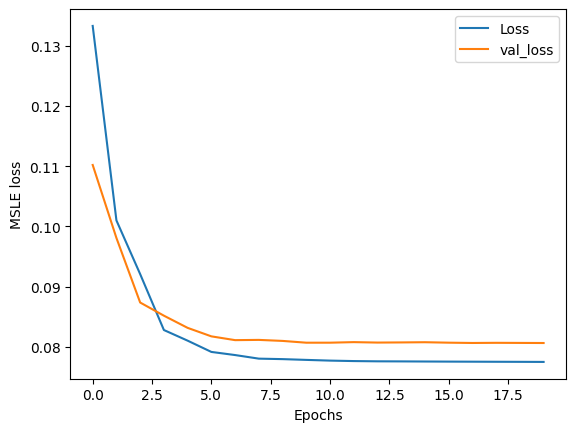

In [23]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('MSLE loss')
plt.legend(['Loss', 'val_loss'])
plt.show()

In [24]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
   + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Threshold: 0.0833343983234238


In [25]:
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.777